# 447 21fa exam 1 due 5p Fri Nov 5


***Notes regarding regrade requests:***

* ***I will accept regrade requests until Sun Nov 21*** -- this will give you time to review your exam and the solutions before requesting a regrade.
* To request a regrade, send me a message using Canvas Conversations with a short explanation of which problem(s) you want regarded, and why you think your solution is equivalent to or equally valid as the one provided.
* ***Note that it is possible your score will decrease after the regrade***, so please be sure you understand the problem and solution before making a request.  To help you understand the problems and their solutions before you submit your request, I am happy to answer questions during office hours.

9.5 <= scores <= 21.0
median score = 18.5 = 92%


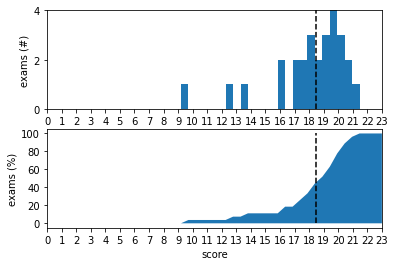

In [ ]:
import numpy as np
import pylab as plt

scores = np.array([ 9.5 , 12.5 , 13.75, 16.  , 16.25, 17.  , 17.  , 17.5 , 17.75,
       18.  , 18.  , 18.25, 18.5 , 18.5 , 19.  , 19.  , 19.25, 19.5 ,
       19.5 , 19.5 , 19.5 , 20.  , 20.  , 20.  , 20.5 , 20.5 , 21.  ])

total = 20

med = np.median(scores)

print('%0.1f <= scores <= %0.1f'%(scores.min(),scores.max()))
print('median score = %0.1f = %0.0f%%'%(med,100*med/total))

xlim = (0,23)
dxlim = (xlim[1]-xlim[0])

plt.figure()
plt.subplot(2,1,1)
h = plt.hist(scores,bins=np.linspace(xlim[0],xlim[1],2*dxlim))
n,s = h[0],h[1]
N = int(np.ceil(h[0].max()))
plt.plot([med,med],[0,N],'k--')
plt.ylim(0,N)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.linspace(0,N,(N+2)//2))
plt.xlim(xlim)
plt.ylabel('exams (#)');

plt.subplot(2,1,2)
n *= 100./n.sum()
n = np.hstack((0.,n))
plt.fill_between(s,np.cumsum(n),0*n)
plt.plot([med,med],[0,100],'k--')
plt.xlim(xlim)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.linspace(0,100,6))
plt.xlabel('score'); plt.ylabel('exams (%)');

# problem (1.)

The following block diagram defines the frequency-domain transformation $y = \frac{P(A+B)}{1 + P B} r + \frac{P}{1 + P B} d $.

In the following problems, let $y_r = \frac{P(A+B)}{1 + P B} r$ denote the reference's contribution to the output and $y_d = \frac{P}{1 + P B} d $ denote the disturbance's contribution to the output.

![block diagram](https://docs.google.com/drawings/d/e/2PACX-1vSrZYQ4nqWsHqgbqBAVMvo3TIwHwhmyB9VR-ve-vz36AkVQRV6v5PAREjXxqDURsiADKVTVprm7p2Y7/pub?w=321&h=138)



## subproblem (1a.)

Use block diagram algebra to determine the transformations $G_{ur}$ and $G_{ud}$ such that $u = G_{ur} r + G_{ud} d$.

### solution

From the block diagram we have

$$ u = A r + B(r-y) = (A + B)r - BP(u+d). $$

Solving for $u$ yields

$$ u = \frac{A + B}{1 + B P} r - \frac{B P}{1 + B P} d = G_{ur} r + G_{ud} d. $$



## subproblem (1b.)

A sinusoidal disturbance can sometimes be perfectly rejected:  give an example of $P$, $B$, and $\omega > 0$ such that $y_d$ is zero when $d(t) = \sin(\omega t)$. 

### solution

We want to choose $P$ so that so that $G_{yd}(\pm j\omega) = 0$ -- since $d(t) = \frac{1}{2i}(e^{j\omega t} - e^{-j\omega})$, this will ensure that $y_d(t) = \frac{1}{2i}(G_{yd}(j\omega) e^{j\omega t} - G_{yd}(-j\omega) e^{-j\omega}) = 0$.

One particular solution is $P(s) = \frac{s^2 + \omega^2}{s^3}$, $B(s) = b$, since this ensures $P(\pm j\omega) = 0$ but $\pm j\omega$ are *not* poles of $P$ *or* $B$ (which could potentially "override" the zero-ing provided by the numerator of $P$).

## subproblem (1c.)

A sinusoidal reference can sometimes be perfectly tracked:  give an example of $P$, $A$, $B$, and $\omega > 0$ such that $y_r = r$ when $r(t) = \sin(\omega t)$.

### solution

We want to choose $P$ so that $G_{yr}(\pm j\omega) = 1$ -- since $r(t) = \frac{1}{2i}(e^{j\omega t} - e^{-j\omega})$, this will ensure that $y_r(t) = \frac{1}{2i}(G_{yr}(j\omega) e^{j\omega t} - G_{yr}(-j\omega) e^{-j\omega}) = r(t)$.

A general solution is to choose $A = P^{-1}$ -- in this case $A$ is called an "inverse" for $P$.  One particular solution is $P(s) = p$, $A(s) = 1/p$, $B(s) = b$.

# problem (2.)

Consider the following process model:

$$ P(s) = \frac{b(s)}{a(s)} = \frac{b s^2}{s^4 + a_1 s^3 + a_2 s^2 + a_3 s + a_4} $$

where $b$ and $a_1,a_2,a_3,a_4$ are nonzero parameters.



## subproblem (2a.)

Suppose $a_1 = 1$, $a_2 = 2$, $a_3 = 1$; what range of values for $a_4$ ensure $P$ is stable?

### solution

We apply the Routh-Hurwitz stability criteria -- for a $4$-th order characteristic polynomial, the conditions from lecture are given as:

$$ a_1, a_2, a_3, a_4 > 0,\quad a_1 a_2 > a_3,\quad a_1 a_2 a_3 > a_1^2 a_4 + a_3^2. $$

With the given values for $a_1, a_2, a_3$, we conclude that $a_4 > 0$ and $2-1 > a_4$ ensures $P$ is stable, so $a_4 \in (0,1)$.

## subproblem (2b.)

Assume $P$ is stable.  If a ramp input $u(t) = c\, t$ is applied to $P$, what output is produced?  

### solution

It's easiest to reason about this in time-domain, where $P$ defines the DE

$$ \ddddot{y} + a_1 \dddot{y} + a_2 \ddot{y} + a_3 \dot{y} + a_4 y = b \ddot{u}. $$

Since the second time derivative of a ramp is zero, we're really just considering the DE's homogeneous response, which decays to zero because we assumed $P$ is stable.  So the output is (asymptotically) zero when a ramp is applied to $P$.

It's also possible to reason about this in frequency-domain, where the Laplace transform of a ramp yields a double-integrator, $\frac{c}{s^2}$.

# problem (3.)

When we run a numerical simulation of a continuous-time linear time-invariant system 
$$\dot{x} = Ax,$$
using the `numerical_simulation` function from lecture, 
we are defining a discrete-time linear time-invariant system
$$ \bar{x}^+ = \bar{A}\bar{x} = \bar{x} + \Delta A \bar{x} $$
where $\Delta > 0$ is the *timestep* parameter.

In this problem, you will study stability properties of the continuous-time system $\dot{x} = A x$ and corresponding discrete-time (numerical simulation) system $\bar{x}^+ = \bar{A}\bar{x}$.



## subproblem (3a.)

Is the system $\dot{x} = A x$ stable when $A = \left[\begin{array}{cc} -1/100 & 1 \\ -1 & -1/100 \end{array}\right]$?  Justify your answer  quantitatively.

Plot the trajectory of the continuous-time system $\dot{x} = A x$ initialized at $x(0) = (1,0)$ determined using the matrix exponential (you can use the analytical expression from lecture or the numerical routine `numpy.expm`).  Use the time interval $[0,10\pi]$.

### solution

The eigenvalues of $A = \left[\begin{array}{cc} \sigma & \omega \\ -\omega & \sigma \end{array}\right]$ are $\sigma \pm j\omega$; since $\sigma < 0$ in the given $A$, the system is stable.

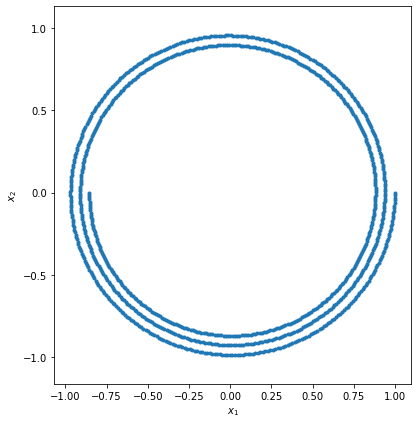

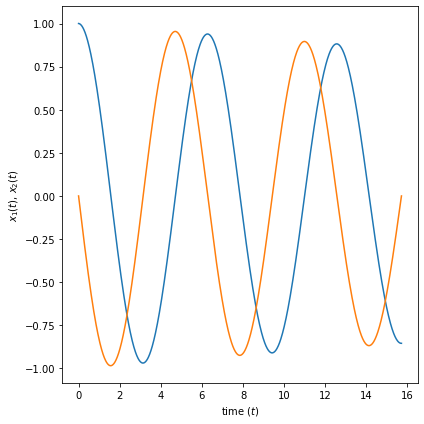

In [ ]:
import numpy as np
from scipy import linalg as la
import pylab as plt

A = np.array([[-.01,1],[-1,-.01]])

t = np.linspace(0,5*np.pi,1000)

x0 = np.array([[1],[0]])

xt = np.hstack([la.expm(A*t_) @ x0 for t_ in t])

plt.figure(figsize=(6,6))
plt.plot(xt[0],xt[1],'.')
plt.axis('equal')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.tight_layout();

plt.figure(figsize=(6,6))
plt.plot(t,xt.T)
plt.xlabel(r'time ($t$)')
plt.ylabel(r'$x_1(t)$, $x_2(t)$')
plt.tight_layout();

## subproblem (3b.)

Plot the trajectory of the discrete-time system $\bar{x}^+ = \bar{A}\bar{x} = \bar{x} + \Delta A \bar{x}$ initialized at $\bar{x}(0) = (1,0)$ with timestep $\Delta = 1/2$ and $A$ as above.   Use the time interval $[0,10\pi]$.

Is the system $\bar{x}^+ = \bar{A}\bar{x} = \bar{x} + \Delta A$ stable when $\Delta = 1/2$?  Justify your answer *qualitatively* with reference to your plot (you do not need to provide a quantitative justification).

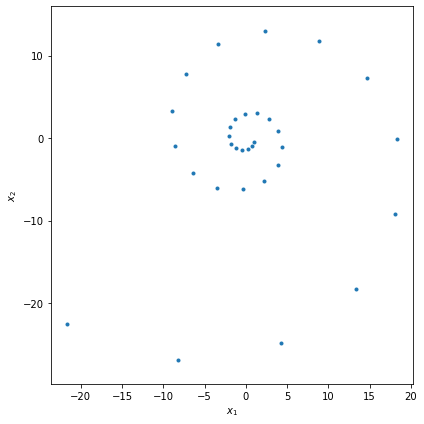

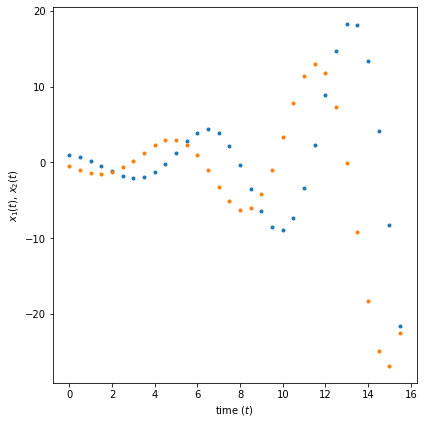

In [ ]:
A = np.array([[-.01,1],[-1,-.01]])

dt = 1/2
t = np.arange(0,5*np.pi,dt)

xt = [x0]
for _ in t:
  xt.append(xt[-1] + dt * A @ xt[-1]) 
xt = np.hstack(xt[1:])

plt.figure(figsize=(6,6))
plt.plot(xt[0],xt[1],'.')
plt.axis('equal')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.tight_layout();

plt.figure(figsize=(6,6))
plt.plot(t,xt.T,'.')
plt.xlabel(r'time ($t$)')
plt.ylabel(r'$x_1(t)$, $x_2(t)$')
plt.tight_layout();

Interestingly, in contrast to the continuous-time system that was used to derive this discrete-time system, this system is *unstable*.

# problem (4.)

Consider the following nonlinear system (NL):
$$
\dot{x_1} = -\lambda x_2 + x_1 x_2,\quad \dot{x_2} = \lambda x_1 + \frac{1}{2}(x_1^2 - x_2^2).
$$



## subproblem (4a.)

Linearize the nonlinear system about the equilibrium $x_e = (-2\lambda,0) \in\mathbb{R}^2$ to determine matrix $A$ such that $\dot{x} \simeq A (x-x_e)$ for $x$ near $x_e$.

### solution



In [ ]:
import sympy as sym

x1,x2,l = sym.symbols(r'x_1,x_2,\lambda')

sym.init_printing()

x1,x2,l

In [ ]:
dx1 = -l*x2 + x1*x2
dx2 = l*x1 + (x1**2 - x2**2)/2

x = sym.Matrix([x1,x2])
f = sym.Matrix([dx1,dx2])

f

⎡ -\lambda⋅x₂ + x₁⋅x₂  ⎤
⎢                      ⎥
⎢               2     2⎥
⎢             x₁    x₂ ⎥
⎢\lambda⋅x₁ + ─── - ───⎥
⎣              2     2 ⎦

In [ ]:
x0 = {x1:-2*l,x2:0}
f.subs(x0)

⎡0⎤
⎢ ⎥
⎣0⎦

In [ ]:
A = sym.Matrix([[sym.diff(fi,xj) for xj in x] for fi in f])
A.subs(x0)

⎡   0      -3⋅\lambda⎤
⎢                    ⎥
⎣-\lambda      0     ⎦

In [ ]:
A.subs(x0).eigenvals()

## subproblem (4b.)

Consider the function 
$$ H(x_1,x_2) = -\frac{\lambda}{2}\left(x_1^2 + x_2^2\right) + \frac{1}{2}\left(x_1 x_2^2 - \frac{1}{3}x_1^3\right). $$

Show that $H(x_1(t),x_2(t))$ is constant along trajectories $(x_1(t),x_2(t))$ of (NL) by computing $\dot{H}$.

### solution

We can compute $\dot{H}$ using the chain rule:

$$ \dot{H} = \frac{d\ }{dt} H(x_1,x_2) = \frac{\partial\ }{\partial x_1} H(x_1,x_2) \cdot \dot{x}_1 + \frac{\partial\ }{\partial x_2} H(x_1,x_2) \cdot \dot{x}_2,$$

and find that the answer is zero:  $\dot{H} = 0$.

In [ ]:
H = -(x1**2 + x2**2)*l/2 + (x1*x2**2 - x1**3/3)/2

D1H = sym.diff(H,x1)
D2H = sym.diff(H,x2)

DtH = D1H * dx1 + D2H * dx2
sym.simplify(DtH)

By the fundamental Theorem of calculus, $H(x_1(t),x_2(t)) = H(x_1(0),x_2(0)) + \int_0^t \dot{H}(x_1(\tau),x_2(\tau)) d\tau = H(x_1(0),x_2(0))$, so $H(x_1(t),x_2(t))$ is constant along trajectories $(x_1(t),x_2(t))$.

## subproblem (4c.)

Create a phase portrait of the nonlinear system (NL) on the square $x_1,x_2\in(-2.5,+2.5)$ with $\lambda = 1$:  use ``plt.quiver`` or ``plt.streamplot`` as in the examples presented in lecture / provided on homework solutions.

How many equilibria do you see in this phase portrait?

In [ ]:
def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(x,u) 

  input:
    f : R x X x U --> X - vector field
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]
  
  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)

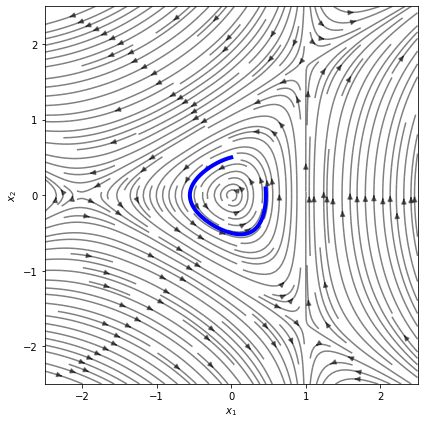

In [ ]:
l = 1 

def f(t,x):
    x1,x2 = x[0],x[1] 
    return np.hstack([-l*x2+x1*x2,
                      +l*x1+(x1**2-x2**2)/2])
    
plt.figure(figsize=(6,6))

dt = 1e-3
t = 5

lim = 2.5

# phase portrait / "quiver" plot
ax = plt.subplot(1,1,1)
X, Y = np.meshgrid(np.linspace(-lim,+lim, 11), np.linspace(-lim, +lim, 11))
dX,dY = np.asarray([f(0.,(x,y)).flatten() for x,y in zip(X.flatten(),Y.flatten())]).T
dX,dY = dX.reshape(X.shape),dY.reshape(Y.shape)
#ax.quiver(X,Y,dX,dY)
ax.streamplot(X,Y,dX,dY,density=2.,color=(0,0,0,.5))
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

t_,x_ = numerical_simulation(f,t,[0,.5],dt=dt)
ax.plot(x_[:,0],x_[:,1],'b',lw=4)

ax.set_xlim((-lim,+lim))
ax.set_ylim((-lim,+lim))

plt.tight_layout()

There are 4 equilibria:
* one "spiral" in the center (at $(0,0)$);
* three "saddles" that form the points of a triangle (at $(-2\lambda,0)$ and $(\lambda,\pm\sqrt{3}\lambda)$).